In [5]:
import pandas as pd
import numpy as np
import glob 
from os.path import join
import ntpath
import os
from collections import defaultdict
import math
import matplotlib.pyplot as plt

from matplotlib import rcParams
%matplotlib inline

In [6]:
def get_dataroot():
    return '/data/juma/data/ids18/'

In [7]:
def get_sampling_dirs(a_dir, only=''):
    dirs = [os.path.join(a_dir, name) for name in os.listdir(a_dir) 
                if os.path.isdir(os.path.join(a_dir, name)) and name.endswith('_l')]
    return sorted(dirs)

In [8]:
def get_avg_abs_recall(d,eval_type='majority'):
    #df = pd.read_csv(join(d,'recall',eval_type,'detection_rate.csv'))
    df = pd.read_csv(join(d,'recall','fold_avg_'+eval_type+'.csv'))
    
    
    long_list = pd.read_csv(join(get_dataroot(),'long_attack_list.csv'),header=None).values
    short_list = pd.read_csv(join(get_dataroot(),'short_attack_list.csv'),header=None).values
    avg_dt = df[df['Label']=='Macro Average of Attacks']['Rc'].values[0]
    long_dts = [ df[df['Label'] ==labels[0]]['Rc'].values[0] for labels in long_list]
    short_dts = [ df[df['Label'] ==labels[0]]['Rc'].values[0] for labels in short_list]    
    return avg_dt,np.array(long_dts).mean(), np.array(short_dts).mean()

In [9]:
def extract_sampler_names(dir_names):
    sampler_names = []
    for dir_name in dir_names:
        if 'SFS' in dir_name:
            label = 'SketchFlow Sampling'
        elif 'SGS' in dir_name:
            label = 'Sketch Guided Sampling'
        elif 'RPS' in dir_name:
            label = 'Random Packet Sampling'
        elif 'FFS' in dir_name:
            label = 'Fast Filtered Sampling'
        elif 'SEL' in dir_name:
            label = 'Selective Flow Sampling'
        elif 'without_sampling_l' in dir_name:
            label = 'Without Sampling'
        else:
            print('Investigate plot_comparison',dir_name)
            
        sampler_names.append(label)
    return sampler_names

In [10]:
roots = ['/data/juma/data/ids18/CSVs_r_1.0/SR_10/',
         '/data/juma/data/ids18/CSVs_r_0.1/SR_10/',
         '/data/juma/data/ids18/CSVs_r_0.01/SR_10/',
        #'/data/juma/data/ids18/CSVs_r_0.001/SR_10/'
        ]

classifier_fingerprint = 'r_1_c_cnn_k_5_mem_constrained_optim_Adam_lr_0.001_reg_0_bs_256_b_explicit'


Fast Filtered Sampling [74.92, 41.36333333333334, 39.046666666666674]
Random Packet Sampling [74.43666666666668, 47.48, 44.44333333333333]
Selective Flow Sampling [98.51666666666667, 74.47333333333334, 67.58666666666666]
SketchFlow Sampling [75.48, 36.60666666666666, 21.833333333333332]
Sketch Guided Sampling [94.18, 67.62666666666667, 52.44]


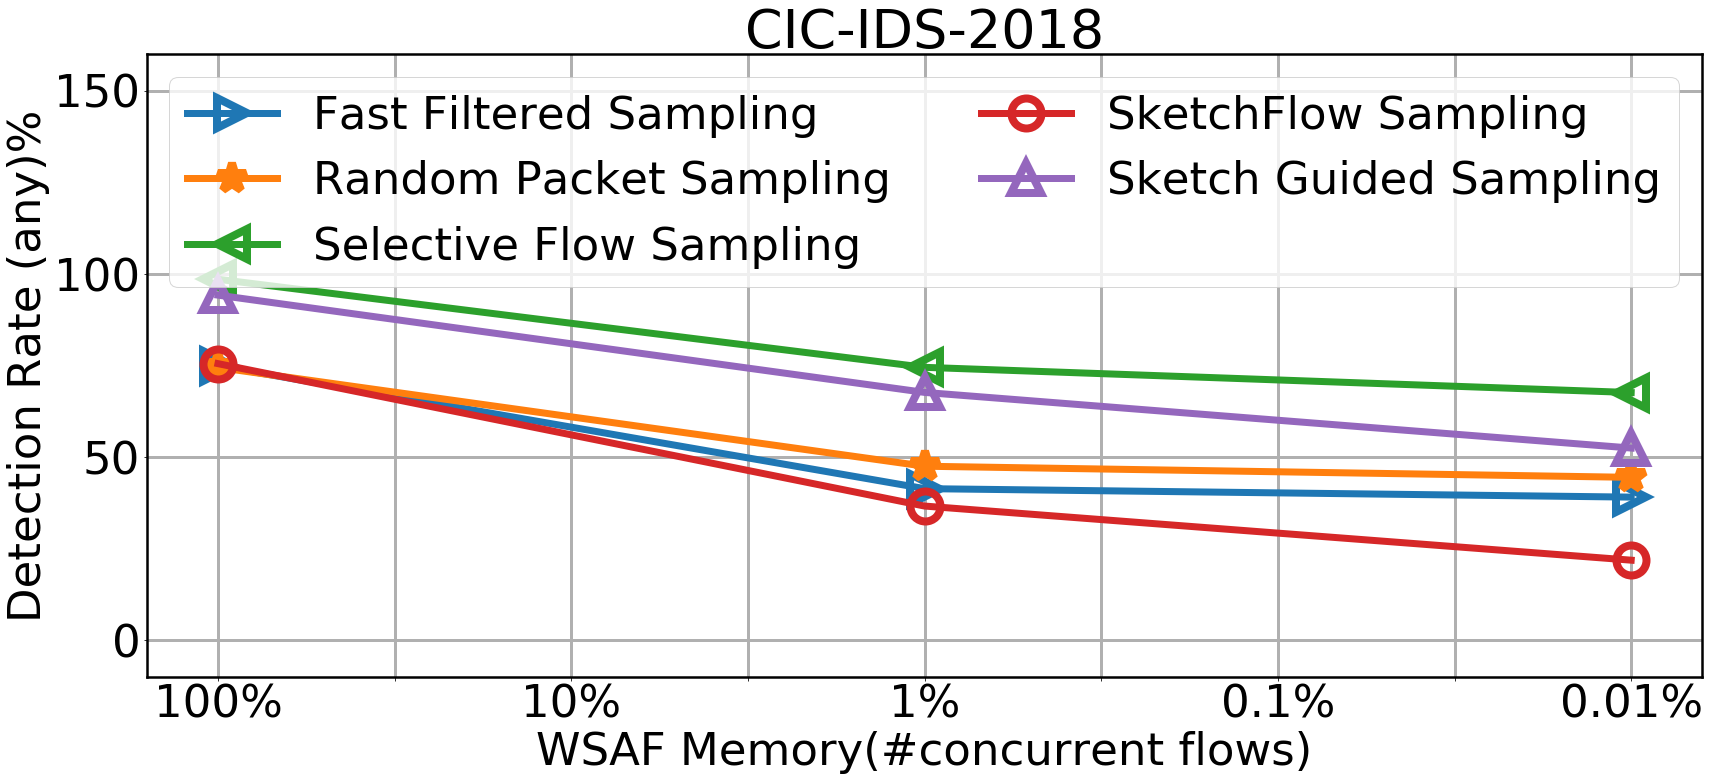

In [11]:
recalls = defaultdict(list)
sampler_names = None
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    sampler_names = extract_sampler_names(sampling_dirs)   
    avg_abs_rcs = [get_avg_abs_recall(join(d,classifier_fingerprint),eval_type='any') for d in sampling_dirs]
    for i,name in enumerate(sampler_names): 
        avg_dr, long_dr, short_dr = avg_abs_rcs[i]
        recalls[name].append(long_dr)
        
    
#drawing
font = {'size'   : 45}
plt.rc('font', **font)
plt.rcParams["axes.linewidth"]  = 2.5
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    print(sampler_names[i],recalls[name])
    ax.plot(np.arange(len(roots)),recalls[name],label=sampler_names[i],linewidth=7,marker=markers[i],markersize=30,markeredgewidth=8,markerfacecolor='none')

plt.grid(linewidth=3)

plt.title('CIC-IDS-2018')
plt.ylabel('Detection Rate (any)%')
plt.xlabel('WSAF Memory(#concurrent flows)')
ax.set_xticklabels(['','100%','','10%','','1%','','0.1%','','0.01%'])
ax.set_ylim(-10,160)
fig.tight_layout()
plt.legend(ncol=2)
plt.savefig('/data/juma/data/ids18/memory_effect_cnn_dt_any_long.png', bbox_inches='tight',dpi=100)
plt.show()

Fast Filtered Sampling [74.92, 7.246666666666667, 5.596666666666667]
Random Packet Sampling [74.43666666666668, 7.666666666666667, 7.29]
Selective Flow Sampling [98.45333333333333, 34.65, 34.13]
SketchFlow Sampling [75.48, 9.459999999999999, 6.449999999999999]
Sketch Guided Sampling [94.17666666666666, 19.433333333333334, 33.14666666666667]


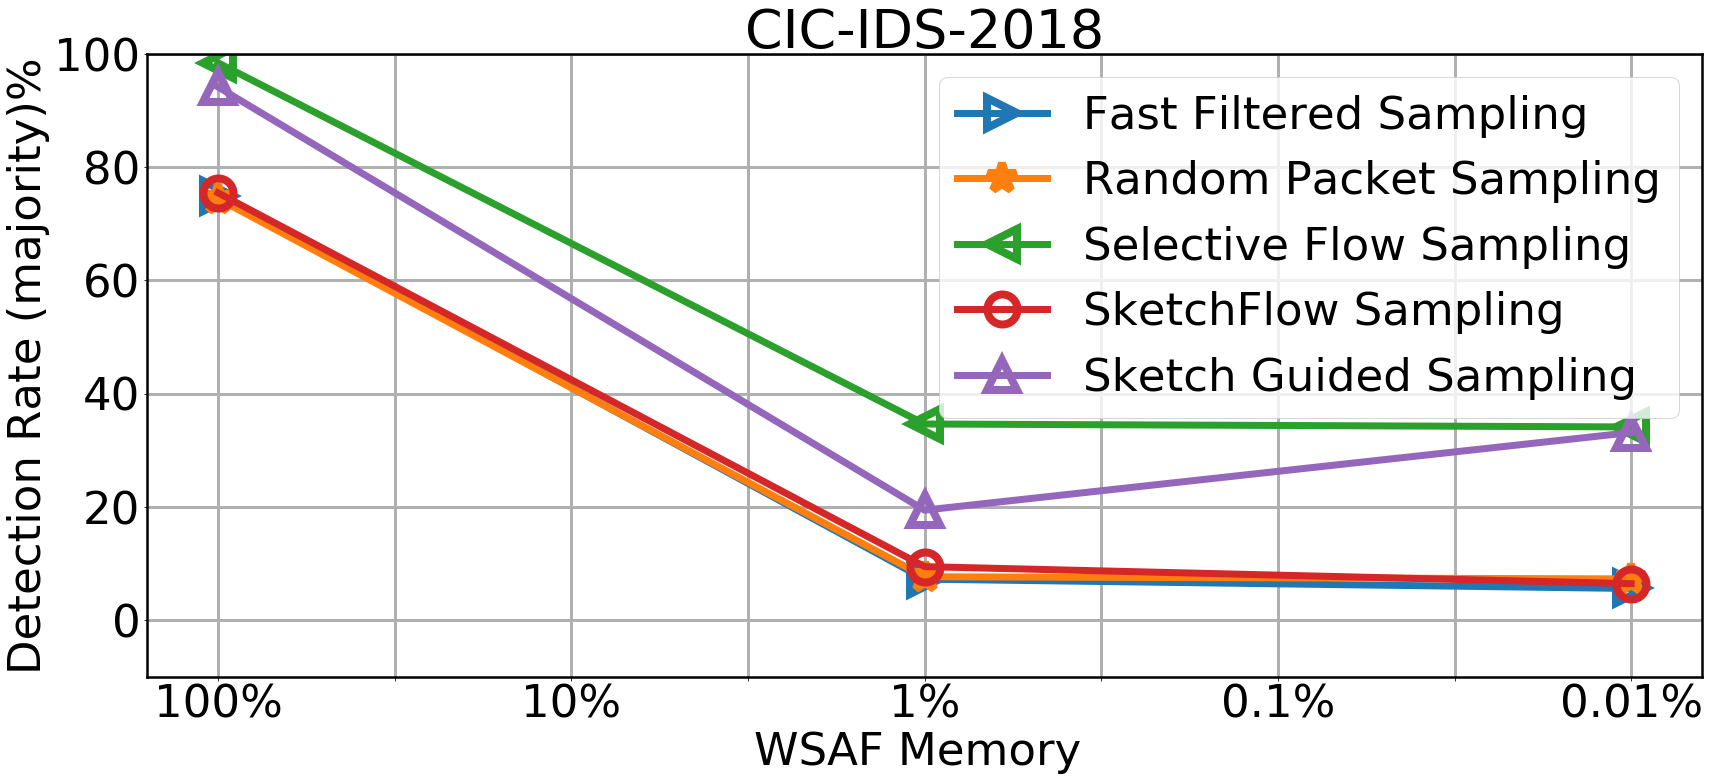

In [12]:
recalls = defaultdict(list)
sampler_names = None
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    sampler_names = extract_sampler_names(sampling_dirs)   
    avg_abs_rcs = [get_avg_abs_recall(join(d,classifier_fingerprint),eval_type='majority') for d in sampling_dirs]
    for i,name in enumerate(sampler_names): 
        avg_dr, long_dr, short_dr = avg_abs_rcs[i]
        recalls[name].append(long_dr)
        
    
#drawing
font = {'size'   : 45}
plt.rc('font', **font)
plt.rcParams["axes.linewidth"]  = 2.5
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    print(sampler_names[i],recalls[name])
    ax.plot(np.arange(len(roots)),recalls[name],label=sampler_names[i],linewidth=7,marker=markers[i],markersize=30,markeredgewidth=8,markerfacecolor='none')

plt.grid(linewidth=3)

plt.title('CIC-IDS-2018')
plt.ylabel('Detection Rate (majority)%')
plt.xlabel('WSAF Memory ')
ax.set_xticklabels(['','100%','','10%','','1%','','0.1%','','0.01%'])
ax.set_ylim(-10,100)
fig.tight_layout()
plt.legend(ncol=1)
plt.savefig('/data/juma/data/ids18/memory_effect_cnn_dt_majority_long.png', bbox_inches='tight',dpi=100)
plt.show()

Fast Filtered Sampling [59.849999999999994, 5.523333333333333, 4.216666666666667]
Random Packet Sampling [55.440000000000005, 5.786666666666666, 5.786666666666666]
Selective Flow Sampling [65.99333333333334, 11.469999999999999, 26.483333333333334]
SketchFlow Sampling [64.24666666666666, 6.486666666666667, 4.946666666666666]
Sketch Guided Sampling [60.116666666666674, 8.64, 10.353333333333333]


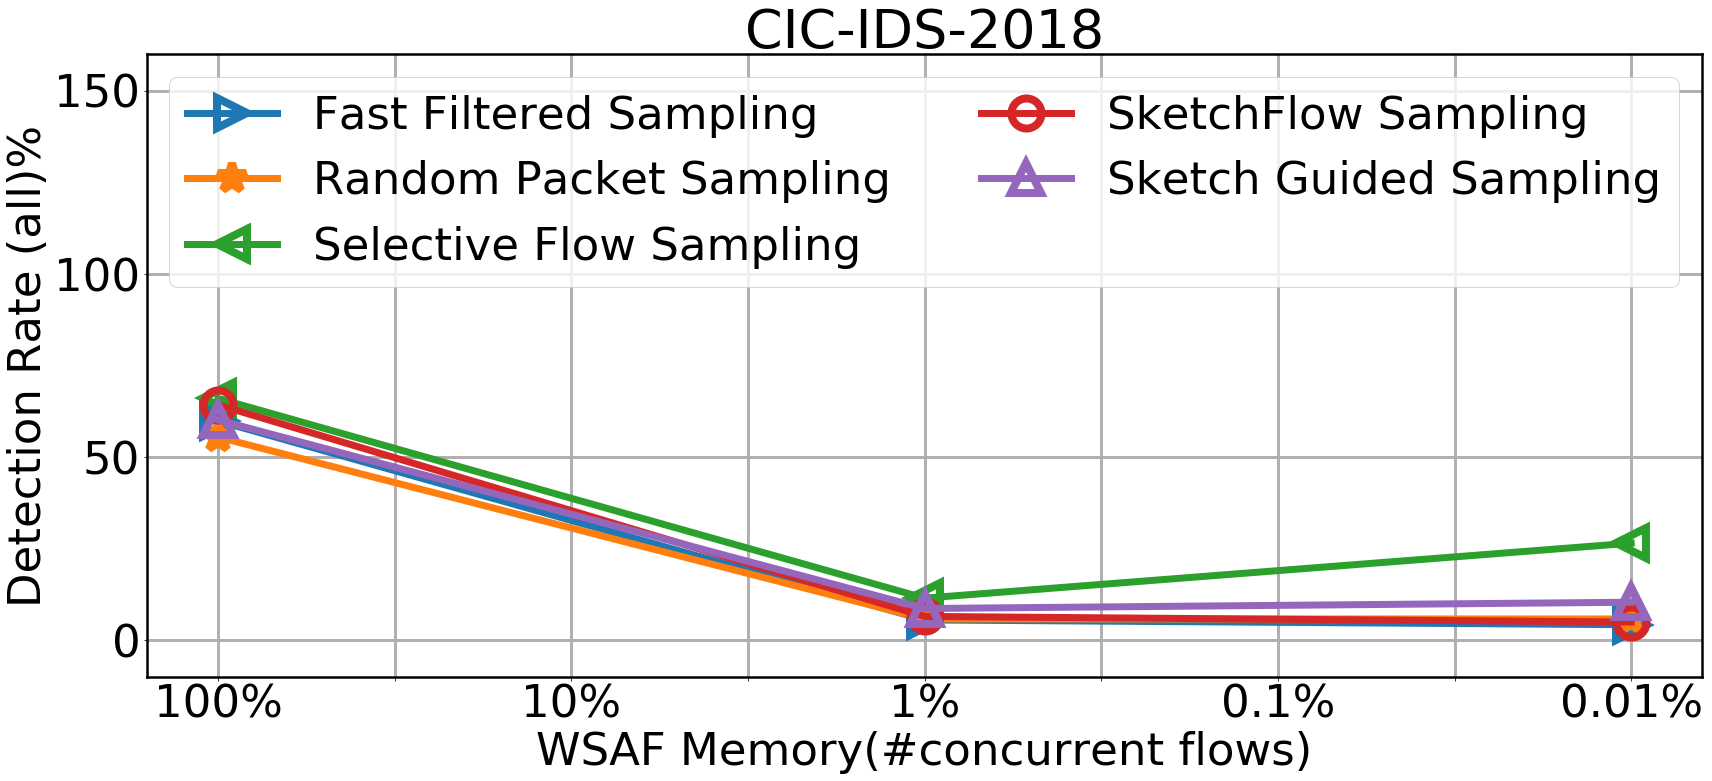

In [13]:
recalls = defaultdict(list)
sampler_names = None
for root in roots:
    sampling_dirs = get_sampling_dirs(root)
    sampler_names = extract_sampler_names(sampling_dirs)   
    avg_abs_rcs = [get_avg_abs_recall(join(d,classifier_fingerprint),eval_type='all') for d in sampling_dirs]
    for i,name in enumerate(sampler_names): 
        avg_dr, long_dr, short_dr = avg_abs_rcs[i]
        recalls[name].append(long_dr)
        
    
#drawing
font = {'size'   : 45}
plt.rc('font', **font)
plt.rcParams["axes.linewidth"]  = 2.5
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
markers = ['>','*','<','o','^']
for i,name in enumerate(sampler_names):
    print(sampler_names[i],recalls[name])
    ax.plot(np.arange(len(roots)),recalls[name],label=sampler_names[i],linewidth=7,marker=markers[i],markersize=30,markeredgewidth=8,markerfacecolor='none')

plt.grid(linewidth=3)

plt.title('CIC-IDS-2018')
plt.ylabel('Detection Rate (all)%')
plt.xlabel('WSAF Memory(#concurrent flows)')
ax.set_xticklabels(['','100%','','10%','','1%','','0.1%','','0.01%'])
ax.set_ylim(-10,160)
fig.tight_layout()
plt.legend(ncol=2)
plt.savefig('/data/juma/data/ids18/memory_effect_cnn_dt_all_long.png', bbox_inches='tight',dpi=200)
plt.show()